## Segmentation and Labelling Example

In [25]:
import pandas as pd
from Data_preparation_Library import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
from sklearn.model_selection import train_test_split
from keras.models import load_model
from random import choice
from scipy import signal
from pickle import load

In [26]:
def filter_df(files_df,order=1,cf=50,fs=2000):
    b,a = signal.butter(1, 50,fs=fs)
    for i in range(len(files_df)):
        emg_df = pd.DataFrame(columns=emg_labels)
        for labels in emg_labels:
            emg_df[labels] = signal.lfilter(b, a,files_df[i][labels])
        files_df[i][emg_labels] = np.array(emg_df)
    return files_df

<AxesSubplot:title={'center':'Subjects/Fazil/day_04_24_21/computed_Hammer.csv'}>

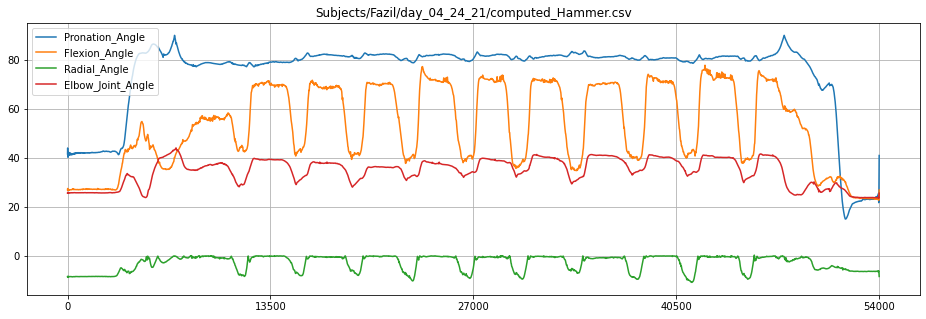

In [49]:
file = 'Subjects/Fazil/day_04_24_21/computed_Hammer.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
df = pd.read_csv(file,index_col=0)
df = filter_df([df])[0]
df[angle_lables].plot(figsize=(16,5),title=file,grid=True,xticks=np.linspace(0,len(df),5))

## DTM Labelling

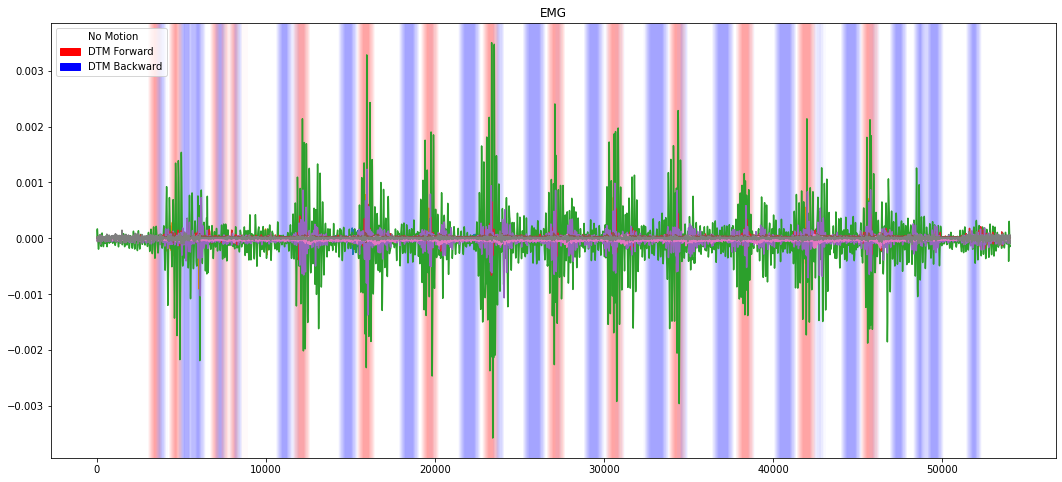

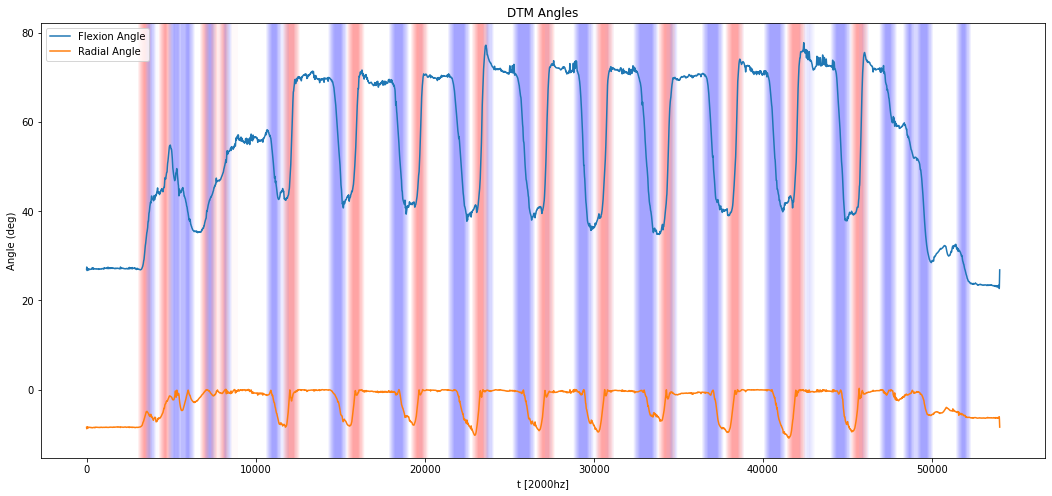

0 -> 58.54477611940298 %
1 -> 15.597014925373134 %
2 -> 25.85820895522388 %


(2680, 400, 8)

In [50]:
X, y = prep_data_DTM(df,400,interval=20,Normalize=False,plot=True,angle_thresh=0.008,rms=False)
X.shape

In [51]:
model = load_model('models/DTM_400_raw.hdf5')
model.evaluate(X,y)

84/84 [==============================] - 1s 9ms/step - loss: 0.0635 - accuracy: 0.9780


[0.06347278505563736, 0.9779850840568542]

In [53]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 400, 8)]     0                                            
__________________________________________________________________________________________________
conv1d_465 (Conv1D)             (None, 400, 32)      256         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_88 (MaxPooling1D) (None, 400, 8)       0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_466 (Conv1D)             (None, 400, 32)      39936       conv1d_465[0][0]                 
____________________________________________________________________________________________

## Pronation Supination 

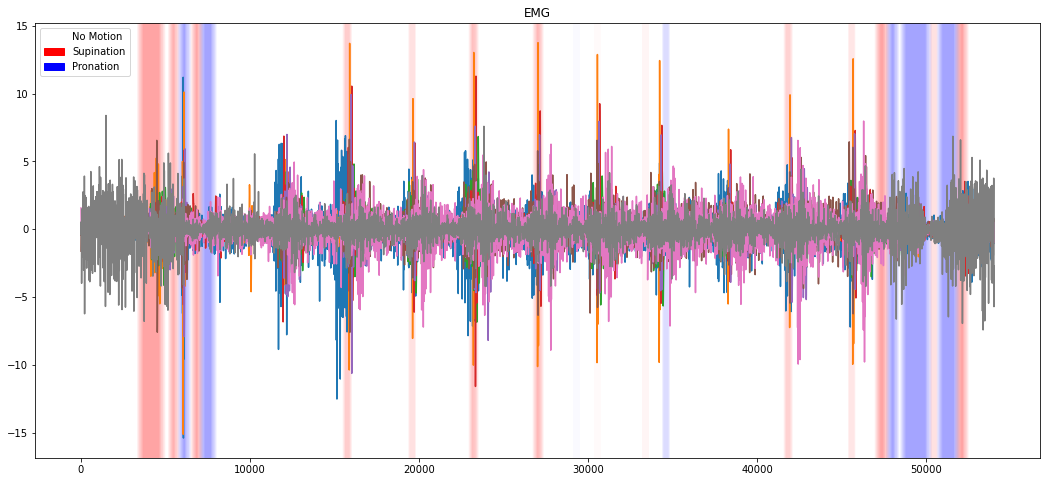

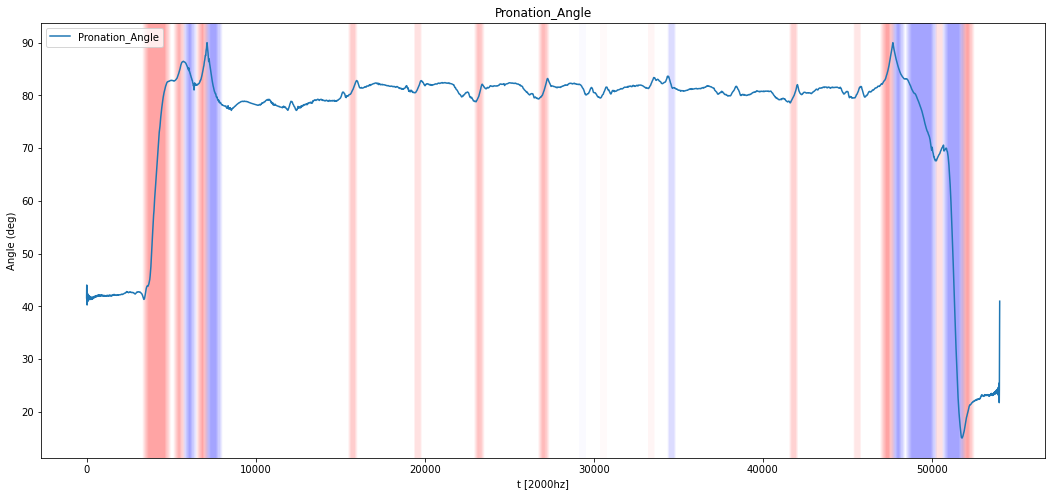

0 -> 83.76865671641791 %
1 -> 8.208955223880597 %
2 -> 8.022388059701493 %


(2680, 400, 8)

In [52]:
X, y = prep_data_prosup(df,400,interval=20,Normalize=False,plot=True,angle_thresh=0.005,rms=False)
X.shape